# **SETUP**

**Importing the Library**

In [962]:
# importing the pandas library 
import pandas as pd 
# importing matplotlib library
import matplotlib.pyplot as plt 
# importing numpy library
import numpy as np 
# importing seaborn library
import seaborn as sns 
# importing preprocessing module from sklearn library
from sklearn import preprocessing 
%matplotlib inline

**Importing the Dataset**

In [963]:
# importing the dataset from csv format and storing it in dataframe named 'df'
df = pd.read_csv('cwk_data_lixhs34.csv') 

# **REMOVING OUTLIERS**

**Cleaning some numerical data based on Visual analysis in previous section (Summarization)**

In [964]:
# Identifying and cleaning the dataset manually for some numerical features, since outlier detection using z-score is not useful for them as they don't follow a proper distribution

# Removing extreme values from campaign
list1 = df[df['campaign']>20].index.tolist()
df.drop(list1,axis=0, inplace=True)

# Removing extreme values from pdays
list1 = df[df['pdays']>400].index.tolist()
df.drop(list1,axis=0, inplace=True)

# Removing extreme values from previous
list1 = df[df['previous']>10].index.tolist()
df.drop(list1,axis=0, inplace=True)

# Reset Index of the dataframe
df=df.reset_index(drop=True)

**Removing other outliers from numerical data that follows somewhat normal distribution i.e Features like “age”, “balance”, “day” and “duration”**

In [965]:
# Standardizing all numerical values 
# importing the StandardScaler module from sklearn.preprocessing package
from sklearn.preprocessing import StandardScaler

# Creating an object of StandardScaler()
object= StandardScaler()
 
# Applying fit_transform() to standardize the numerical data and save it in 'scale'
scale = object.fit_transform(df[["age","balance","day","duration"]]) 

# Standardized data is stored in dataframe with appropriate column names
scaled_numerical_data = pd.DataFrame(scale, columns= ["age","balance","day","duration"])

# Printing the standardized values
print(scaled_numerical_data)

           age   balance       day  duration
0     0.381505 -0.439868 -1.058737  0.344456
1     2.298483 -0.021356  0.140266  1.488541
2    -1.079050 -0.624866  0.619867 -0.335165
3    -0.531342 -0.372023 -0.219435  0.187358
4     1.294352  0.628305 -0.818936  0.050750
...        ...       ...       ...       ...
3916  0.016367 -0.506531 -1.538338  1.939345
3917 -0.440057 -0.444996  0.619867 -0.242955
3918 -0.805196 -0.359006 -1.178637 -0.584473
3919 -0.987765  0.810935 -1.538338 -0.178067
3920 -0.805196 -0.450913  0.739767 -0.956728

[3921 rows x 4 columns]


In [966]:
list2 = []
# for loop to access all values of each column of scaled_numerical_data
for i in scaled_numerical_data.columns:
  # Storing index of rows detected as outliers i.e rows having z-score greater than 3 and less than -3
  list2 = list2 + scaled_numerical_data[(scaled_numerical_data[i]>3) | (scaled_numerical_data[i]<-3)].index.tolist()

# Dropping the rows identified as outliers using their indices
df.drop(list2,axis=0, inplace=True)

# Reset Index of the dataframe
df=df.reset_index(drop=True)
# View the final shape of the dataset after removing the outliers
print(df.shape)

(3714, 16)


**Separating input and output features**

In [967]:
# storing all the input features to the variable 'x'
x = df.iloc[:,:-1] 
# storing the output feature to the variable 'y' and converting it to dataframe
y = pd.DataFrame(df.iloc[:,-1],columns=['y']) 
# Taking a look at first few rows of the dataset
x.head() 

,age,job,marital,education,default,balance,housing,loan,contact,day,duration,campaign,pdays,previous,poutcome
0,45,entrepreneur,married,tertiary,no,169,no,no,cellular,7,391,4,-1,0,unknown
1,66,housemaid,married,primary,no,1230,no,no,cellular,17,726,3,-1,0,unknown
2,29,blue-collar,divorced,secondary,no,-300,no,no,unknown,21,192,1,-1,0,unknown
3,35,services,married,secondary,no,341,yes,no,cellular,14,345,1,-1,0,unknown
4,55,services,married,tertiary,no,2877,no,no,cellular,9,305,1,91,2,other


**Separating numerical and categorical data from the input features**

In [968]:
# Extracting Numerical data from the dataset
numerical_data = x.select_dtypes(include=[np.number]) 
# Extracting Categorical data from the dataset
categorical_data = x.select_dtypes(exclude=[np.number]) 

# **DATA PRE-PROCESSING**

## **Converting categorical data to numeric data using encoding**
---

### **Label Encoding**

---






**FOR ORDINAL CATEGORICAL VARIABLES**


> For our dataset, we have only 1 ordinal categorical variable i.e 'education' - having categories : primary, secondary, tertiary which is converted to 0,1 and 2 respectively



In [969]:
# creating an object label_encoder of class 'LabelEncoder' to use it for applying label encoding
label_encoder = preprocessing.LabelEncoder() 
print(categorical_data.head())
# Applying Label Encoding to 'education' column
temp = label_encoder.fit_transform(categorical_data['education'])
print('\n')
# Replacing the original values with the encoded values
categorical_data['education']= temp
# View the dataset
print(categorical_data.head())

            job   marital  education default housing loan   contact poutcome
0  entrepreneur   married   tertiary      no      no   no  cellular  unknown
1     housemaid   married    primary      no      no   no  cellular  unknown
2   blue-collar  divorced  secondary      no      no   no   unknown  unknown
3      services   married  secondary      no     yes   no  cellular  unknown
4      services   married   tertiary      no      no   no  cellular    other


            job   marital  education default housing loan   contact poutcome
0  entrepreneur   married          2      no      no   no  cellular  unknown
1     housemaid   married          0      no      no   no  cellular  unknown
2   blue-collar  divorced          1      no      no   no   unknown  unknown
3      services   married          1      no     yes   no  cellular  unknown
4      services   married          2      no      no   no  cellular    other


<ipython-input-969-d448a1c84984>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_data['education']= temp


**FOR BINARY CATEGORICAL VARIABLES**



> For 'default', 'housing' and 'loan' features, we convert yes to 1 and no to 0



In [970]:
# Creating an object label_encoder of class 'LabelEncoder' to use it for applying label encoding
label_encoder = preprocessing.LabelEncoder()

# View data before conversion
print(categorical_data.head())

# identifying number of unique values in each categorical variable. So that binary categorical variables can be used to convert to 0,1 using label encoding
for i in categorical_data:
  print(i,': ',categorical_data[i].nunique())
  # check for binary categorical variables i.e features having just 2 classes
  if categorical_data[i].nunique()==2:
    # Applying Label Encoding and store it in new column
    categorical_data.loc[:,i+' (Label Encoding)']= label_encoder.fit_transform(categorical_data[i])
    # copy the values from new column to old column in order to replace the original categorical values by numerical values
    categorical_data.loc[:,i] = categorical_data.loc[:,i+' (Label Encoding)']
    # delete the newly created columns once the values are copied
    del categorical_data[i+' (Label Encoding)']

# View data after conversion
print(categorical_data.head())

            job   marital  education default housing loan   contact poutcome
0  entrepreneur   married          2      no      no   no  cellular  unknown
1     housemaid   married          0      no      no   no  cellular  unknown
2   blue-collar  divorced          1      no      no   no   unknown  unknown
3      services   married          1      no     yes   no  cellular  unknown
4      services   married          2      no      no   no  cellular    other
job :  12
marital :  3
education :  4
default :  2
housing :  2
loan :  2
contact :  3
poutcome :  4
            job   marital  education  default  housing  loan   contact  \
0  entrepreneur   married          2        0        0     0  cellular   
1     housemaid   married          0        0        0     0  cellular   
2   blue-collar  divorced          1        0        0     0   unknown   
3      services   married          1        0        1     0  cellular   
4      services   married          2        0        0     0  cellu

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


**FOR OUTPUT VARIABLE**

we convert yes to 1 and no to 0

In [971]:
# Creating an object label_encoder of class 'LabelEncoder' to use it for applying label encoding
label_encoder = preprocessing.LabelEncoder() 
# View data before conversion
print(y.head())
# Applying Label Encoding
temp = pd.DataFrame(label_encoder.fit_transform(y.iloc[:,0]),columns=['y'])
# Replacing the original categorical values by numerical values
y= temp
# View data after conversion
print(y.head())

     y
0   no
1  yes
2   no
3  yes
4   no
   y
0  0
1  1
2  0
3  1
4  0


### **ONE-HOT/DUMMY ENCODING FOR NOMINAL CATEGORICAL VARIABLES**

For 'job', 'marital', 'contact' and 'poutcome' variables, we apply one-hot encoding technique



In [972]:
# View data before conversion
print(categorical_data.head())
for i in categorical_data:
  print(i,': ',categorical_data[i].nunique())
  # check for multiple categorical variables i.e features having more than 2 classes but excluding 'education' where we have already applied label encoding 
  if categorical_data[i].nunique()!=2 and i!='education':
    # Applying One Hot Encoding
    dummies = pd.get_dummies(categorical_data[i]) 
    # renaming columns to avoid duplicate names like 'unknown' which exists in each of poutcome, education, contact, etc
    dummies = dummies.add_prefix(i+': ')  
    # Avoiding the dummy trap by removing the last extra column generated
    dummies.drop(columns=dummies.columns[-1], axis=1,  inplace=True)
    # Adding the newly generated columns to the original dataset
    categorical_data = pd.concat([categorical_data,dummies],axis=1)
    # Delete the original categorical column 
    del categorical_data[i]

# View data after conversion
print(categorical_data.head())

            job   marital  education  default  housing  loan   contact  \
0  entrepreneur   married          2        0        0     0  cellular   
1     housemaid   married          0        0        0     0  cellular   
2   blue-collar  divorced          1        0        0     0   unknown   
3      services   married          1        0        1     0  cellular   
4      services   married          2        0        0     0  cellular   

  poutcome  
0  unknown  
1  unknown  
2  unknown  
3  unknown  
4    other  
job :  12
marital :  3
education :  4
default :  2
housing :  2
loan :  2
contact :  3
poutcome :  4
   education  default  housing  loan  job: admin.  job: blue-collar  \
0          2        0        0     0            0                 0   
1          0        0        0     0            0                 0   
2          1        0        0     0            0                 1   
3          1        0        1     0            0                 0   
4          2        0

## **Standardization of numerical data**

---



In [973]:
# Standardizing all numerical values 
# importing the StandardScaler module from sklearn.preprocessing package
from sklearn.preprocessing import StandardScaler

# Creating an object of StandardScaler()
object= StandardScaler()
 
# Applying fit_transform() to standardize the numerical data and save it in 'scale'
scale = object.fit_transform(numerical_data) 

# Standardized data is stored in dataframe with appropriate column names
scaled_numerical_data = pd.DataFrame(scale, columns = numerical_data.columns)

# Printing the standardized values
print(scaled_numerical_data)

           age   balance       day  duration  campaign     pdays  previous
0     0.439462 -0.540540 -1.057383  0.589501  0.594644 -0.420184 -0.361133
1     2.463998  0.150736  0.136742  2.110438  0.176683 -0.420184 -0.361133
2    -1.103041 -0.846109  0.614392 -0.313982 -0.659240 -0.420184 -0.361133
3    -0.524603 -0.428477 -0.221495  0.380655 -0.659240 -0.420184 -0.361133
4     1.403526  1.223811 -0.818558  0.199051 -0.659240  0.570268  1.124190
...        ...       ...       ...       ...       ...       ...       ...
3709  0.053836 -0.650649 -1.535033  2.709732 -0.659240 -0.420184 -0.361133
3710 -0.428196 -0.549010  0.614392 -0.191399 -0.241279 -0.420184 -0.361133
3711 -0.813822 -0.406976 -1.176795 -0.645410  1.430566 -0.420184 -0.361133
3712 -1.006635  1.525471 -1.535033 -0.105136  0.176683 -0.420184 -0.361133
3713 -0.813822 -0.558783  0.733805 -1.140282  4.356295 -0.420184 -0.361133

[3714 rows x 7 columns]


## **Combining Processed Dataset on which Decision Tree Classification can be applied for feature selection**

In [974]:
# Combining processed categorical data and numerical data to get the final processed dataset
processed_df = pd.concat([scaled_numerical_data,categorical_data,y],axis=1)
processed_df.reset_index(drop=True)

print(processed_df.head())

# Storing all input features in "processed_x"
processed_x = processed_df.iloc[:,:-1]
# Storing output feature in "processed_y"
processed_y = pd.DataFrame(processed_df.iloc[:,-1],columns=['y'])

        age   balance       day  duration  campaign     pdays  previous  \
0  0.439462 -0.540540 -1.057383  0.589501  0.594644 -0.420184 -0.361133   
1  2.463998  0.150736  0.136742  2.110438  0.176683 -0.420184 -0.361133   
2 -1.103041 -0.846109  0.614392 -0.313982 -0.659240 -0.420184 -0.361133   
3 -0.524603 -0.428477 -0.221495  0.380655 -0.659240 -0.420184 -0.361133   
4  1.403526  1.223811 -0.818558  0.199051 -0.659240  0.570268  1.124190   

   education  default  housing  ...  job: technician  job: unemployed  \
0          2        0        0  ...                0                0   
1          0        0        0  ...                0                0   
2          1        0        0  ...                0                0   
3          1        0        1  ...                0                0   
4          2        0        0  ...                0                0   

   marital: divorced  marital: married  contact: cellular  contact: telephone  \
0                  0         

# **SECTION B: EXPLORATION**

## **Decision Tree Classification model**

              Features  Importance
0             duration   31.914854
1    poutcome: success   12.019270
2                  age   10.750560
3                  day    9.601967
4              balance    8.228051
5                pdays    4.342031
6             campaign    4.078177
7            education    3.275069
8              housing    2.620001
9      job: management    1.693080
10    marital: married    1.571235
11            previous    1.214341
12   marital: divorced    1.051873
13   contact: cellular    1.029123
14    job: blue-collar    0.857176
15       job: services    0.855116
16  contact: telephone    0.726453
17         job: admin.    0.619099
18     job: technician    0.595039
19                loan    0.577189
20        job: retired    0.517794
21        job: student    0.490316
22   poutcome: failure    0.475080
23     job: unemployed    0.353562
24   job: entrepreneur    0.243882
25             default    0.155966
26     poutcome: other    0.129353
27  job: self-employ

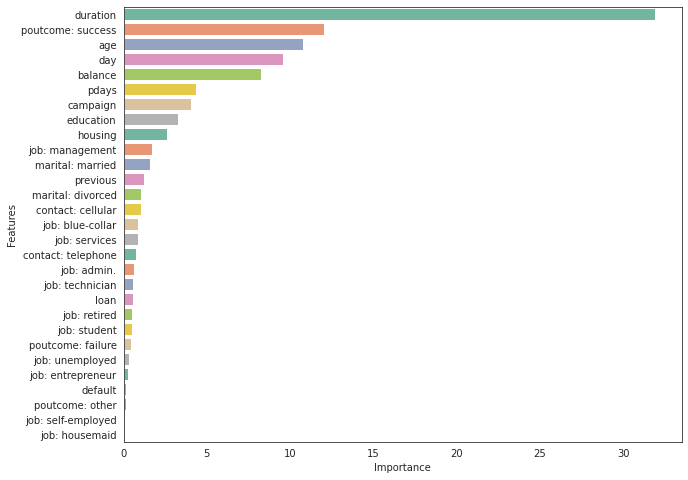

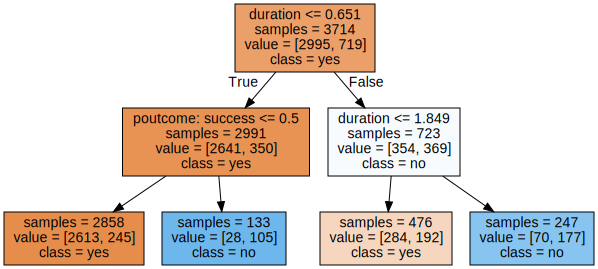

In [975]:
# Applying Decision Tree Classification model to know the importance of each feature in predicting the output
# decision tree for feature importance on a classification problem
# Importing DecisionTreeClassifier module from sklearn.tree package
from sklearn.tree import DecisionTreeClassifier
# Importing export_graphviz module from sklearn.tree package to eplot the tree diagram
import graphviz
from sklearn.tree import export_graphviz
# Creating model of DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=2)
# Fitting the data to model
model.fit(processed_x, processed_y)
# Extracting feature importance values
importance = model.feature_importances_

# Storing feature importance values as dataframe and assigning column names to it
feature_importance = pd.concat([pd.DataFrame(processed_x.columns,columns=['Features']),pd.DataFrame(importance,columns=['Importance'])*100],axis='columns')

# Sorting the Dataframe by descending values of feature importance and resetting the index
feature_imp = feature_importance.sort_values(by='Importance',ascending=False).reset_index(drop=True)
# deleting the redundant feature_importance dataframe
del feature_importance

# Priting the features and theri importance values
print(feature_imp.head(35))

# Defining figure size for the plot
plt.figure(figsize=(10,8))
# Assigning colour paletter for plot
temp = sns.color_palette("Set2")
# Plotting barchart for the importance values of the features
sns.barplot(y='Features',x='Importance',data=feature_imp,palette=temp)
# Display chart
plt.show()
# Creating another DecisionTreeClassifier model with max_depth=2 for visualizing a decision tree
dt = DecisionTreeClassifier(max_depth=2)
# Fitting the data to model
dt.fit(processed_x, processed_y)
# Exporting the tree.dot file with information essential for plotting the tree
export_graphviz(dt,out_file="tree.dot",class_names=['yes','no'],feature_names=processed_x.columns,impurity=False,filled=True)
# Reading the tree.dot file in order to plot the tree
with open('tree.dot') as f:
  dot_graph = f.read()
# Plotting the decision tree
graphviz.Source(dot_graph)


## **Feature Selection - Removing unwanted features and keeping only important features for training the model**

In [976]:
# Dropping 30% of the features having low feature importance values
processed_x.drop(feature_imp.loc[21:,'Features'].to_list(),axis = 1, inplace=True)
# Dropping "duration" feature as it will not be used for training the model
processed_x.drop(["duration"],axis = 1, inplace=True)
# Checking the shape of the final input features features which will be used for training the ML models
print(processed_x.shape)

(3714, 20)


# **SECTION C: MODEL EVALUATION**

## **Testing Model Accuracy scores using K-fold Cross Validation**
(Logistic Regression, Decision trees, K-nearest neighbours, Random Forest and Naive Bayes Classifiers)

In [977]:
# from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyClassifier
# Importing linear_model module from sklearn package for logistic regression model
from sklearn import linear_model
# Importing tree module from sklearn package for decision tree model
from sklearn import tree
# Importing tree module from sklearn.neighbours package for K-nearest neighbour model
from sklearn.neighbors import KNeighborsClassifier
# Importing RandomForestClassifier module from sklearn.ensemble package for Random Forest Model
from sklearn.ensemble import RandomForestClassifier
# Importing GaussianNB module from sklearn.naive_bayes package for Naive Bayes Model
from sklearn.naive_bayes import GaussianNB

# Creating six classifiers to compare
dc = DummyClassifier()
lr = linear_model.LogisticRegression(C=1)
dt = tree.DecisionTreeClassifier(max_depth=4,min_samples_leaf=7,random_state=2)
# knn3 = KNeighborsClassifier(n_neighbors=3)
knn4 = KNeighborsClassifier(n_neighbors=4)
rand = RandomForestClassifier(max_depth=3,min_samples_leaf=3,random_state=2)
nb = GaussianNB()

# Setting up folds
folds = KFold(n_splits=5, shuffle=True, random_state=31)

# Test models with cross validation for accurcay score
dc_scores = cross_val_score(dc, processed_x, processed_y.values.ravel(), scoring='accuracy', cv=folds)
lr_scores = cross_val_score(lr, processed_x, processed_y.values.ravel(), scoring='accuracy', cv=folds)
dt_scores = cross_val_score(dt, processed_x, processed_y.values.ravel(), scoring='accuracy', cv=folds)
# knn3_scores = cross_val_score(knn3, processed_x, processed_y.values.ravel(), scoring='accuracy', cv=folds)
knn4_scores = cross_val_score(knn4, processed_x, processed_y.values.ravel(), scoring='accuracy', cv=folds)
rand_scores = cross_val_score(rand, processed_x, processed_y.values.ravel(), scoring='accuracy', cv=folds)
nb_scores = cross_val_score(nb, processed_x, processed_y.values.ravel(), scoring='accuracy', cv=folds)

# Printing the average result of accuracy test scores
print("Baseline Accuracy:", np.mean(dc_scores))
print("Logistic Regression Accuracy:", np.mean(lr_scores))
print("Decision Tree Accuracy:", np.mean(dt_scores))
# print("K-NN (n=3) Accuracy:", np.mean(knn3_scores))
print("K-NN (n=4) Accuracy:", np.mean(knn4_scores))
print("Random Forest Accuracy:", np.mean(rand_scores))
print("Naive Bayes Accuracy:", np.mean(nb_scores))

Baseline Accuracy: 0.8064105959303907
Logistic Regression Accuracy: 0.8352214559609363
Decision Tree Accuracy: 0.834953728056651
K-NN (n=4) Accuracy: 0.8144859660515212
Random Forest Accuracy: 0.8338751981658099
Naive Bayes Accuracy: 0.803990524318618


## **Model Evaluation using Confusion Matrix**

### **Dummy Classifier - Confusion Matrix**

Accuracy for baseline model =  0.8064081852450189
Precision for baseline model =  nan
Sensitivity for baseline model =  0.0
Specificity for baseline model =  1.0


<ipython-input-978-8283b13ad091>:17: RuntimeWarning: invalid value encountered in long_scalars
  dc_precision = dc_matrix.iloc[1,1]/(dc_matrix.iloc[0,1]+dc_matrix.iloc[1,1])


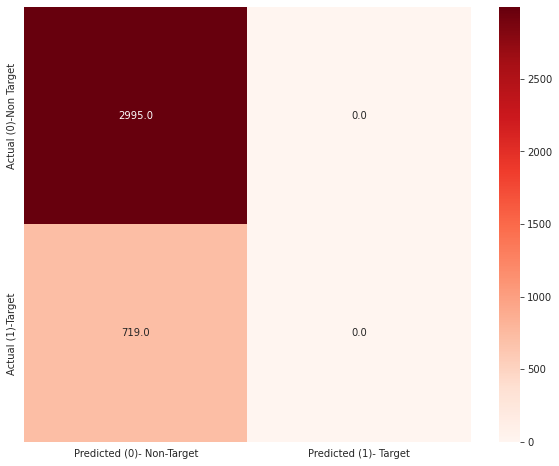

In [978]:
#-- example of a confusion matrix for one of the classifiers
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict

# Confusion Matrix for Dummy Classifier
# Get the prediction obtained using Dummy Classifier Model
dc_pred = cross_val_predict(dc, processed_x, processed_y.values.ravel(), cv=folds)
# Get the confusion matrix for Dummy Classifier Model
dc_matrix = confusion_matrix(processed_y.values.ravel(), dc_pred)
# Storing Confusion Matrix as Dataframe and providing column and row names
dc_matrix = pd.DataFrame(dc_matrix,columns=['Predicted (0)- Non-Target','Predicted (1)- Target'],index=['Actual (0)-Non Target','Actual (1)-Target'])

# Calculating the accuracy of the model
dc_accuracy = (dc_matrix.iloc[0,0]+dc_matrix.iloc[1,1])/(dc_matrix.iloc[0,0]+dc_matrix.iloc[0,1]+dc_matrix.iloc[1,0]+dc_matrix.iloc[1,1])
print('Accuracy for baseline model = ',dc_accuracy)
# Calculating the precision of the model (Precision is undefined because we are not predicting any result to be 'yes' which is our target class for marketing)
dc_precision = dc_matrix.iloc[1,1]/(dc_matrix.iloc[0,1]+dc_matrix.iloc[1,1])
print('Precision for baseline model = ',dc_precision)
# Calculating the sensitivity or recall of the model
dc_sensitivity = dc_matrix.iloc[1,1]/(dc_matrix.iloc[1,0]+dc_matrix.iloc[1,1])
print('Sensitivity for baseline model = ',dc_sensitivity)
# Calculating the specificity of the model
dc_specificity = dc_matrix.iloc[0,0]/(dc_matrix.iloc[0,0]+dc_matrix.iloc[0,1])
print('Specificity for baseline model = ',dc_specificity)

#-- display the confusion matrices as heatmaps
sns.set_style("white")
plt.rcParams['figure.figsize'] = (10.0, 8.0)
sns.heatmap(dc_matrix, annot=True, fmt=".1f", cmap="Reds", cbar=True)
plt.show()

### **Logistic Regression - Confusion Matrix**

Accuracy for Logistic Regression model =  0.8352180936995154
Precision for Logistic Regression model =  0.7891891891891892
Sensitivity for Logistic Regression model =  0.20305980528511822
Specificity for Logistic Regression model =  0.9869782971619365


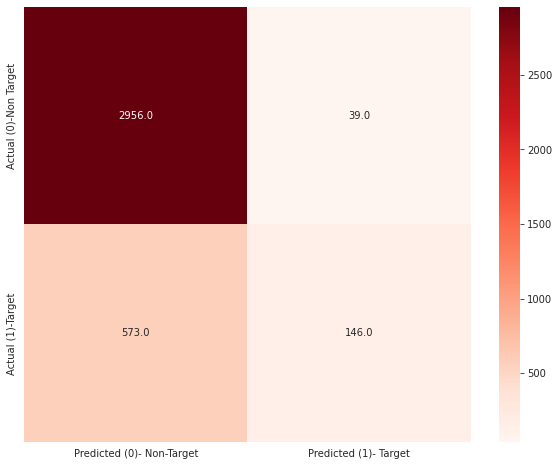

In [979]:
# Confusion Matrix for Logistic Regression Classifier
# Get the prediction obtained using Logistic Regression Model
lr_pred = cross_val_predict(lr, processed_x, processed_y.values.ravel(), cv=folds)
# Get the confusion matrix for Logistic Regression Model
lr_matrix = confusion_matrix(processed_y.values.ravel(), lr_pred)
# Storing Confusion Matrix as Dataframe and providing column and row names
lr_matrix = pd.DataFrame(lr_matrix,columns=['Predicted (0)- Non-Target','Predicted (1)- Target'],index=['Actual (0)-Non Target','Actual (1)-Target'])

# Calculating the accuracy of the model
lr_accuracy = (lr_matrix.iloc[0,0]+lr_matrix.iloc[1,1])/(lr_matrix.iloc[0,0]+lr_matrix.iloc[0,1]+lr_matrix.iloc[1,0]+lr_matrix.iloc[1,1])
print('Accuracy for Logistic Regression model = ',lr_accuracy)
# Calculating the precision of the model (Precision is undefined because we are not predicting any result to be 'yes' which is our target class for marketing)
lr_precision = lr_matrix.iloc[1,1]/(lr_matrix.iloc[0,1]+lr_matrix.iloc[1,1])
print('Precision for Logistic Regression model = ',lr_precision)
# Calculating the sensitivity or recall of the model
lr_sensitivity = lr_matrix.iloc[1,1]/(lr_matrix.iloc[1,0]+lr_matrix.iloc[1,1])
print('Sensitivity for Logistic Regression model = ',lr_sensitivity)
# Calculating the specificity of the model
lr_specificity = lr_matrix.iloc[0,0]/(lr_matrix.iloc[0,0]+lr_matrix.iloc[0,1])
print('Specificity for Logistic Regression model = ',lr_specificity)

# display the confusion matrix as heatmap
sns.set_style("white")
# Define Figure size
plt.rcParams['figure.figsize'] = (10.0, 8.0)
# Plot Heatmap for Confusion Matrix
sns.heatmap(lr_matrix, annot=True, fmt=".1f", cmap="Reds", cbar=True)

### **Random Forest - Confusion Matrix**

Accuracy for Random Forest model =  0.8338718362950996
Precision for Random Forest model =  0.8269230769230769
Sensitivity for Random Forest model =  0.17941585535465926
Specificity for Random Forest model =  0.9909849749582638


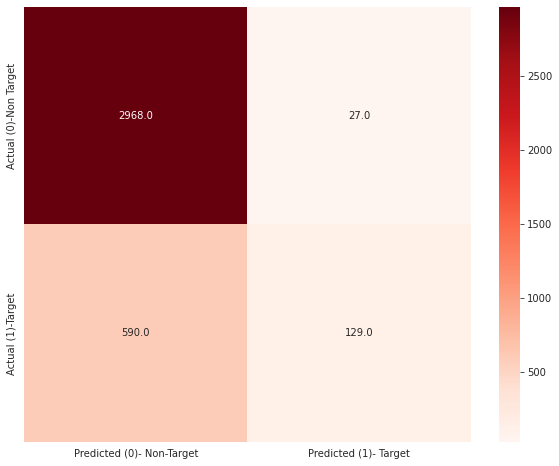

In [980]:
# Confusion Matrix for Random Forest Classifier
# Get the prediction obtained using Random Forest Model
rand_pred = cross_val_predict(rand, processed_x, processed_y.values.ravel(), cv=folds)
# Get the confusion matrix for Random Forest Model
rand_matrix = confusion_matrix(processed_y.values.ravel(), rand_pred)
# Storing Confusion Matrix as Dataframe and providing column and row names
rand_matrix = pd.DataFrame(rand_matrix,columns=['Predicted (0)- Non-Target','Predicted (1)- Target'],index=['Actual (0)-Non Target','Actual (1)-Target'])

# Calculating the accuracy of the model
rand_accuracy = (rand_matrix.iloc[0,0]+rand_matrix.iloc[1,1])/(rand_matrix.iloc[0,0]+rand_matrix.iloc[0,1]+rand_matrix.iloc[1,0]+rand_matrix.iloc[1,1])
print('Accuracy for Random Forest model = ',rand_accuracy)
# Calculating the precision of the model (Precision is undefined because we are not predicting any result to be 'yes' which is our target class for marketing)
rand_precision = rand_matrix.iloc[1,1]/(rand_matrix.iloc[0,1]+rand_matrix.iloc[1,1])
print('Precision for Random Forest model = ',rand_precision)
# Calculating the sensitivity or recall of the model
rand_sensitivity = rand_matrix.iloc[1,1]/(rand_matrix.iloc[1,0]+rand_matrix.iloc[1,1])
print('Sensitivity for Random Forest model = ',rand_sensitivity)
# Calculating the specificity of the model
rand_specificity = rand_matrix.iloc[0,0]/(rand_matrix.iloc[0,0]+rand_matrix.iloc[0,1])
print('Specificity for Random Forest model = ',rand_specificity)

# display the confusion matrix as heatmap
sns.set_style("white")
# Define Figure size
plt.rcParams['figure.figsize'] = (10.0, 8.0)
# Plot Heatmap for Confusion Matrix
sns.heatmap(rand_matrix, annot=True, fmt=".1f", cmap="Reds", cbar=True)

### **K Nearest Neighbour - Confusion Matrix**

Accuracy for K Nearest Neighbour model =  0.8144857296715132
Precision for K Nearest Neighbour model =  0.5681818181818182
Sensitivity for K Nearest Neighbour model =  0.17385257301808066
Specificity for K Nearest Neighbour model =  0.9682804674457429


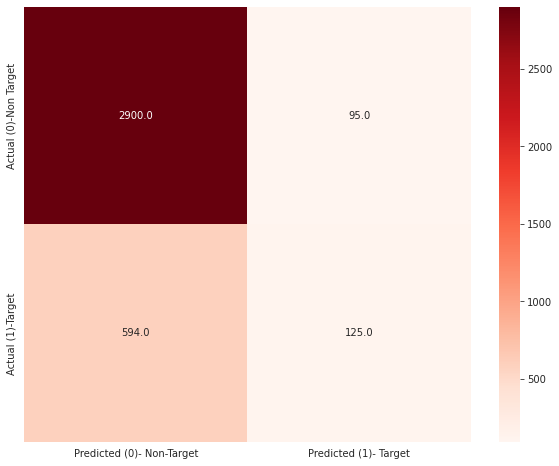

In [981]:
# Confusion Matrix for K Nearest Neighbour Classifier
# Get the prediction obtained using K Nearest Neighbour Model
knn4_pred = cross_val_predict(knn4, processed_x, processed_y.values.ravel(), cv=folds)
# Get the confusion matrix for K Nearest Neighbour Model
knn4_matrix = confusion_matrix(processed_y.values.ravel(), knn4_pred)
# Storing Confusion Matrix as Dataframe and providing column and row names
knn4_matrix = pd.DataFrame(knn4_matrix,columns=['Predicted (0)- Non-Target','Predicted (1)- Target'],index=['Actual (0)-Non Target','Actual (1)-Target'])

# Calculating the accuracy of the model
knn4_accuracy = (knn4_matrix.iloc[0,0]+knn4_matrix.iloc[1,1])/(knn4_matrix.iloc[0,0]+knn4_matrix.iloc[0,1]+knn4_matrix.iloc[1,0]+knn4_matrix.iloc[1,1])
print('Accuracy for K Nearest Neighbour model = ',knn4_accuracy)
# Calculating the precision of the model (Precision is undefined because we are not predicting any result to be 'yes' which is our target class for marketing)
knn4_precision = knn4_matrix.iloc[1,1]/(knn4_matrix.iloc[0,1]+knn4_matrix.iloc[1,1])
print('Precision for K Nearest Neighbour model = ',knn4_precision)
# Calculating the sensitivity or recall of the model
knn4_sensitivity = knn4_matrix.iloc[1,1]/(knn4_matrix.iloc[1,0]+knn4_matrix.iloc[1,1])
print('Sensitivity for K Nearest Neighbour model = ',knn4_sensitivity)
# Calculating the specificity of the model
knn4_specificity = knn4_matrix.iloc[0,0]/(knn4_matrix.iloc[0,0]+knn4_matrix.iloc[0,1])
print('Specificity for K Nearest Neighbour model = ',knn4_specificity)

# display the confusion matrix as heatmap
sns.set_style("white")
# Define Figure size
plt.rcParams['figure.figsize'] = (10.0, 8.0)
# Plot Heatmap for Confusion Matrix
sns.heatmap(knn4_matrix, annot=True, fmt=".1f", cmap="Reds", cbar=True)

### **Naive Bayes - Confusion Matrix**

Accuracy for Naive Bayes model =  0.8039849219170705
Precision for Naive Bayes model =  0.4898419864559819
Sensitivity for Naive Bayes model =  0.30180806675938804
Specificity for Naive Bayes model =  0.9245409015025041


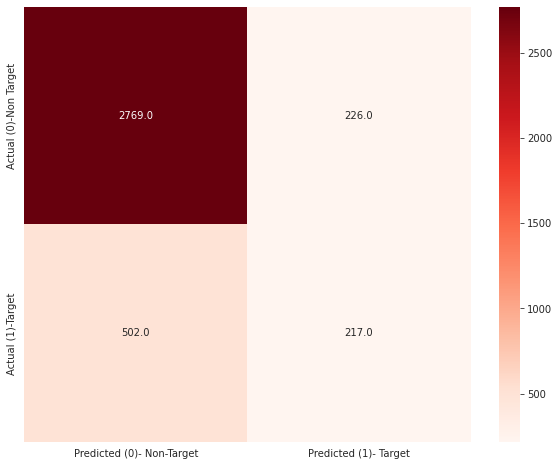

In [982]:
# Confusion Matrix for Naive Bayes Classifier
# Get the prediction obtained using Naive Bayes Model
nb_pred = cross_val_predict(nb, processed_x, processed_y.values.ravel(), cv=folds)
# Get the confusion matrix for Naive Bayes Model
nb_matrix = confusion_matrix(processed_y.values.ravel(), nb_pred)
# Storing Confusion Matrix as Dataframe and providing column and row names
nb_matrix = pd.DataFrame(nb_matrix,columns=['Predicted (0)- Non-Target','Predicted (1)- Target'],index=['Actual (0)-Non Target','Actual (1)-Target'])

# Calculating the accuracy of the model
nb_accuracy = (nb_matrix.iloc[0,0]+nb_matrix.iloc[1,1])/(nb_matrix.iloc[0,0]+nb_matrix.iloc[0,1]+nb_matrix.iloc[1,0]+nb_matrix.iloc[1,1])
print('Accuracy for Naive Bayes model = ',nb_accuracy)
# Calculating the precision of the model (Precision is undefined because we are not predicting any result to be 'yes' which is our target class for marketing)
nb_precision = nb_matrix.iloc[1,1]/(nb_matrix.iloc[0,1]+nb_matrix.iloc[1,1])
print('Precision for Naive Bayes model = ',nb_precision)
# Calculating the sensitivity or recall of the model
nb_sensitivity = nb_matrix.iloc[1,1]/(nb_matrix.iloc[1,0]+nb_matrix.iloc[1,1])
print('Sensitivity for Naive Bayes model = ',nb_sensitivity)
# Calculating the specificity of the model
nb_specificity = nb_matrix.iloc[0,0]/(nb_matrix.iloc[0,0]+nb_matrix.iloc[0,1])
print('Specificity for Naive Bayes model = ',nb_specificity)

# display the confusion matrix as heatmap
sns.set_style("white")
# Define Figure size
plt.rcParams['figure.figsize'] = (10.0, 8.0)
# Plot Heatmap for Confusion Matrix
sns.heatmap(nb_matrix, annot=True, fmt=".1f", cmap="Reds", cbar=True)

# **SECTION D: MODEL ASSESSMENT**

Considering the business case for measuring success, we must consider “precision” of models along
with its “accuracy”. The winning classifier model is the “Random Forest” model 

# **SECTION E: MODEL IMPLEMENTATION**

In [983]:
# Importing pickle package to save ML model
import pickle
final_model = RandomForestClassifier(max_depth=4,min_samples_leaf=7)
# Fit the model on processed dataset
final_model.fit(processed_x, processed_y)

# Saving the trained model as 'model_final.pkl' as a binary file
file_name = 'Model_final.pkl'
pickle.dump(final_model,open(file_name,'wb'))

<ipython-input-983-e410ff92f71e>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  final_model.fit(processed_x, processed_y)
